In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Separando o dataset de treinamento do dataset de teste
<text>
Os dados foram separados colocando 70% do dataset aleatoriamente como treinamento, e o que sobra vai para o teste.
</text>

In [121]:
df = pd.read_csv('covid_Einstein.csv')

#separando o dataframe de testes e o de treinamento
X = df.loc[:, df.columns != 'Exame']
y =  df['Exame']

print(X.shape, y.shape)

(120, 8) (120,)


# Criando as árvores de decisão

<text>
Uma das árvores utiliza o splitter aleatório enquanto a outra usa o aprimorado.
</text>

<text> 
Foi usado um cross-validation "splittando" os dados em 10 iterações.
</text>

In [129]:
tree_default = DecisionTreeClassifier(random_state=10)
tree_best = DecisionTreeClassifier(min_samples_leaf=5, max_depth = 1, criterion='entropy', random_state=10, splitter='best')

scores_default = cross_val_score(tree_default, X, y, cv=10)
scores_best = cross_val_score(tree_best, X, y, cv=10)


# Previsão
<text>Agora vamos checar os valores de acurácia que resultaram dos 10 splits de cada árvore, bme como a acurácia de cada uma  </text>

In [130]:
scores_default

array([0.91666667, 0.66666667, 0.66666667, 0.66666667, 0.83333333,
       0.66666667, 0.58333333, 0.58333333, 0.58333333, 0.75      ])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe2541092b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe254109970>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe2540fef10>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe254095070>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe2540953d0>],
 'means': []}

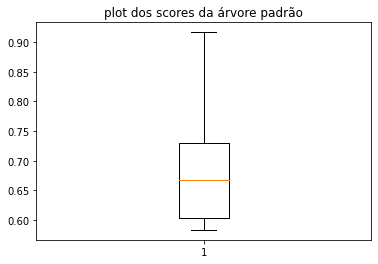

In [131]:
fig1, ax1 = plt.subplots()
ax1.set_title('plot dos scores da árvore padrão')
ax1.boxplot(scores_default)

In [132]:
scores_best

array([0.75      , 0.75      , 0.83333333, 0.75      , 0.83333333,
       0.66666667, 0.66666667, 0.75      , 0.75      , 0.91666667])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe25405dc70>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe25406c370>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe25405d910>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe25406ca90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe25406cdf0>],
 'means': []}

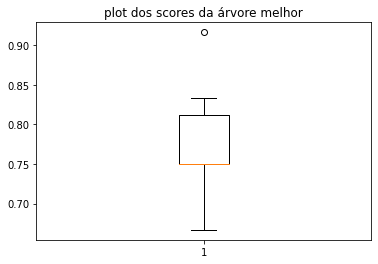

In [133]:
fig1, ax1 = plt.subplots()
ax1.set_title('plot dos scores da árvore melhor')
ax1.boxplot(scores_best)

# previsão para a árvore padrão

In [134]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_default.mean(), scores_default.std() * 2))

Accuracy: 0.69 (+/- 0.21)


# Previsão para árvore melhor

In [135]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_best.mean(), scores_best.std() * 2))

Accuracy: 0.77 (+/- 0.15)
